# Homework 9: scikit-image
# Margaret Doyle
Due April 28th at 8pm


## Problem 1: Asteroid tracking

Complete the asteroid tracking breakout from class.



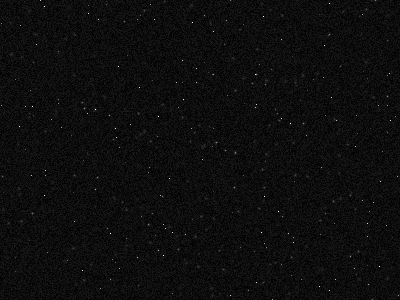

In [88]:
%matplotlib inline

import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

import matplotlib
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (10, 7)

frames = ski.io.ImageCollection('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/DataFiles_and_Notebooks/10_scikit-image/asteroid/asteroid_*.png')

#Get animated image
Image('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/DataFiles_and_Notebooks/10_scikit-image/asteroid/asteroid.gif', width=600)



I want to collect my results from a few different trials, so I can see what works and what does not

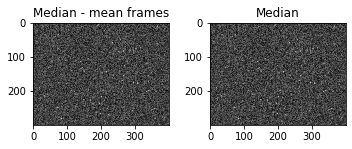

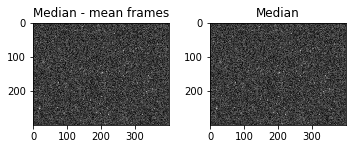

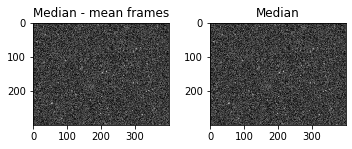

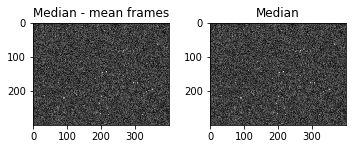

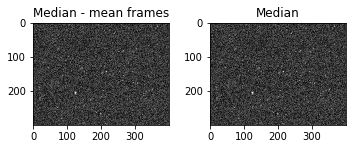

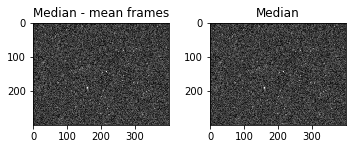

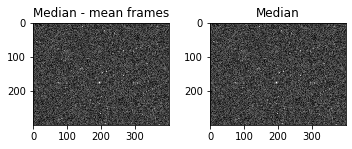

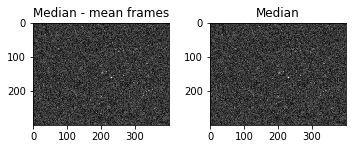

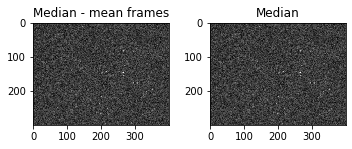

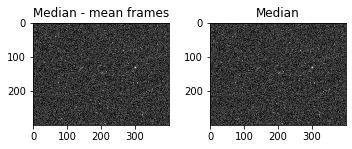

In [89]:
from skimage.feature import peak_local_max
median = []

bright_spot_try1 = [] #Trial 1: Get peak from median - mean(frames), thresh_rel = 0.98
bright_spot_try2 = [] #Trial 2: Get peak from median , number of peaks = 1
bright_spot_try3 = [] #Trial 3: Get peak from median - mean(frames) , thresh_rel = 0.3
bright_spot_try4 = [] #Trial 4: Get peak from median - mean(frames) , min_distance = 50 
bright_spot_try5 = [] #Trial 5: Get peak from median - frames[0] , threshold_abs = 200 

#Loop over all frames 
for x in frames:
    ##return local median of image 
    median.append(ski.filters.median(x))
    fig, ax = plt.subplots(1,2,figsize=[5,5])
    
    ax[0].imshow(median[-1] - np.mean(frames))
    ax[0].set_title('Median - mean frames')
    ax[1].imshow(median[-1])
    ax[1].set_title('Median')
    plt.tight_layout()
    plt.show()
    bright_spot_try1.append(peak_local_max(median[-1] - np.mean(frames), threshold_rel=0.98))
    bright_spot_try2.append(peak_local_max(median[-1], num_peaks = 1))
    bright_spot_try3.append(peak_local_max(median[-1] - np.mean(frames), threshold_rel=0.3))
    bright_spot_try4.append(peak_local_max(median[-1] - np.mean(frames), min_distance = 50 ))
    bright_spot_try5.append(peak_local_max(median[-1] -frames[0], threshold_abs = 200 ))


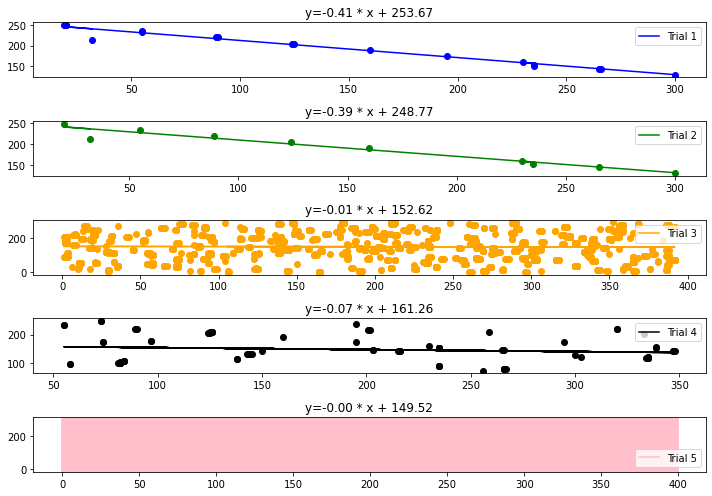

In [90]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b



#Plot results from all trials
fig, ax = plt.subplots(5,1)

allx = []
ally = []
for x in bright_spot_try1:
    ax[0].scatter(x[:, 1], x[:, 0], color='blue')
    allx.append(x[:, 1])
    ally.append(x[:, 0])
popt, pcov = curve_fit(line, np.concatenate(allx).ravel(),np.concatenate(ally).ravel())
ax[0].plot(np.concatenate(allx).ravel(), line(np.concatenate(allx).ravel(),*popt), color='blue', label ='Trial 1')
ax[0].legend()
ax[0].set_title('y=%0.2f * x + %0.2f' %(popt[0], popt[1]))

allx = []
ally = []
for x in bright_spot_try2:
    ax[1].scatter(x[:, 1], x[:, 0], color='green')
    allx.append(x[:, 1])
    ally.append(x[:, 0])
popt, pcov = curve_fit(line, np.concatenate(allx).ravel(),np.concatenate(ally).ravel())
ax[1].plot(np.concatenate(allx).ravel(), line(np.concatenate(allx).ravel(),*popt),  color='green',label ='Trial 2')
ax[1].legend()
ax[1].set_title('y=%0.2f * x + %0.2f' %(popt[0], popt[1]))

allx = []
ally = []
for x in bright_spot_try3:
    ax[2].scatter(x[:, 1], x[:, 0], color='orange')
    allx.append(x[:, 1])
    ally.append(x[:, 0])
popt, pcov = curve_fit(line, np.concatenate(allx).ravel(),np.concatenate(ally).ravel())
ax[2].plot(np.concatenate(allx).ravel(), line(np.concatenate(allx).ravel(),*popt), color='orange', label ='Trial 3')
ax[2].legend()
ax[2].set_title('y=%0.2f * x + %0.2f' %(popt[0], popt[1]))

allx = []
ally = []
for x in bright_spot_try4:
    ax[3].scatter(x[:, 1], x[:, 0], color='black')
    allx.append(x[:, 1])
    ally.append(x[:, 0])
popt, pcov = curve_fit(line, np.concatenate(allx).ravel(),np.concatenate(ally).ravel())
ax[3].plot(np.concatenate(allx).ravel(), line(np.concatenate(allx).ravel(),*popt), color='black', label ='Trial 4')
ax[3].legend()
ax[3].set_title('y=%0.2f * x + %0.2f' %(popt[0], popt[1]))


allx = []
ally = []
for x in bright_spot_try5:
    ax[4].scatter(x[:, 1], x[:, 0], color='pink')
    allx.append(x[:, 1])
    ally.append(x[:, 0])
popt, pcov = curve_fit(line, np.concatenate(allx).ravel(),np.concatenate(ally).ravel())
ax[4].plot(np.concatenate(allx).ravel(), line(np.concatenate(allx).ravel(),*popt), color='pink', label ='Trial 5')
ax[4].legend()
ax[4].set_title('y=%0.2f * x + %0.2f' %(popt[0], popt[1]))


plt.tight_layout()
plt.show()


# What worked well, what went wrong, and what approaches could help in a real-world scenario to improve results?

My Answer: 
I found that setting a low relative threshold ( < 0.4) did not work super well-it just resulted in too many peaks being found, making the fit impossible.  However, anything above 0.8 for a relative threshold seemed to work decently and allowed me to make a linear fit to the trajectory. I also found that forcing only one peak to be found resulted in pretty nice results as well. 


I also attempted to find the spot based off setting a minimum distance between peaks, but this also worked poorly. And setting an absolute threshold was challenging and seemed to give me the worst results out of every trial. 



In a real world scenario, perhaps being able to adjust the contrast, or collect more "background/ ground state images" during collection collection. They can then be used as a nice reference. 

## Problem 2: Panorama stitching

One of the scikit-image tutorials shows [how to do panorama stitching](https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/solutions/adv3_panorama-stitching-solution.ipynb).

Take 3 or 4 overlapping photos of your own, and use the procedure described to stitch your own panorama.

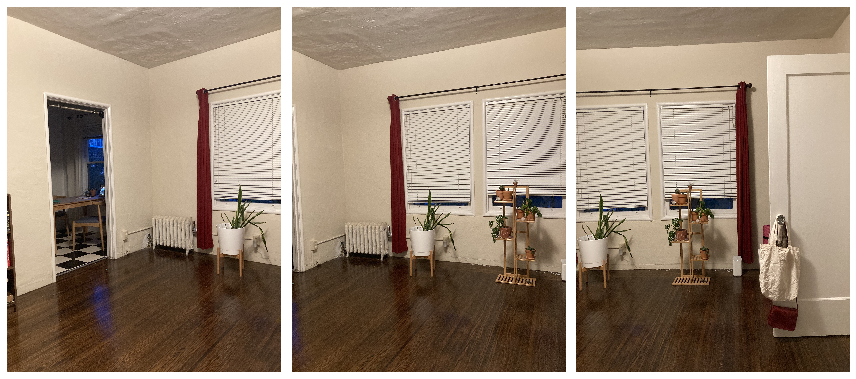

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray

#Include function provided from scikit tutorial for comparing images 
def compare(*images, **kwargs):
    """
    Utility function to display images side by side.
    
    Parameters
    ----------
    image0, image1, image2, ... : ndarrray
        Images to display.
    labels : list
        Labels for the different images.
    """
    f, axes = plt.subplots(1, len(images), **kwargs)
    axes = np.array(axes, ndmin=1)
    
    labels = kwargs.pop('labels', None)
    if labels is None:
        labels = [''] * len(images)
    
    for n, (image, label) in enumerate(zip(images, labels)):
        axes[n].imshow(image, interpolation='nearest', cmap='gray')
        axes[n].set_title(label)
        axes[n].axis('off')
    
    f.tight_layout()
    

#Load in images from my apartment
pano_imgs = io.ImageCollection('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/hw_9/IMG_*.jpg')

compare(*pano_imgs, figsize=(12, 10))
room_pano0, room_pano1, room_pano2 = [rgb2gray(im) for im in pano_imgs]

Next, I need to relate these images. The middle shot will be my anchor or "target" image. I will then detect features in all three images and match the features to the anchored image

In [79]:
from skimage.feature import ORB
from skimage.feature import match_descriptors
from skimage.feature import plot_matches

# Initialize oriented FAST and rotated BRIEF features
orb = ORB(n_keypoints=800, fast_threshold=0.05)

# Detect keypoints in all three images
orb.detect_and_extract(room_pano0)
keypoints0 = orb.keypoints
descriptors0 = orb.descriptors

orb.detect_and_extract(room_pano1)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors


orb.detect_and_extract(room_pano2)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors


# Match descriptors between left/right images and the center
matches01 = match_descriptors(descriptors0, descriptors1, cross_check=True)
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

Plot matches from left and center images

And also plot matches from center and right images

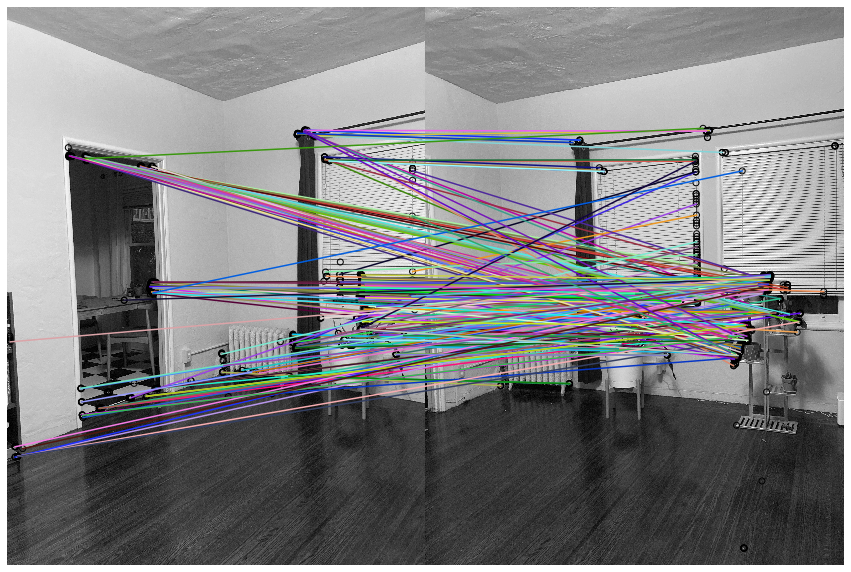

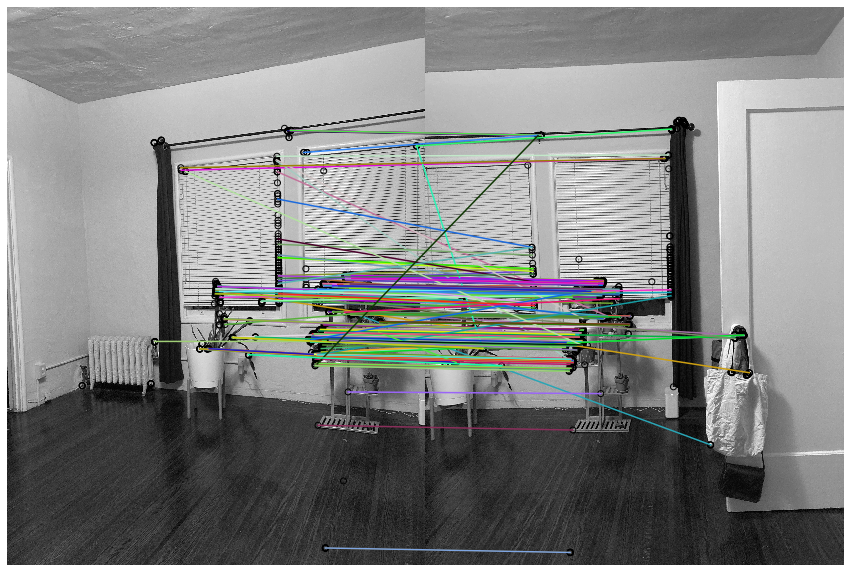

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

plot_matches(ax, room_pano0, room_pano1, keypoints0, keypoints1, matches01)
ax.axis('off');

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

plot_matches(ax, room_pano1, room_pano2, keypoints1, keypoints2, matches12)
ax.axis('off');

Next, reject outliers from my false matches using random sample concencus.

In [81]:
from skimage.transform import ProjectiveTransform
from skimage.measure import ransac

src = keypoints0[matches01[:, 0]][:, ::-1]
dst = keypoints1[matches01[:, 1]][:, ::-1]

model_robust01, inliers01 = ransac((src, dst), ProjectiveTransform,
                                   min_samples=4, residual_threshold=1, max_trials=300)

src = keypoints2[matches12[:, 1]][:, ::-1]
dst = keypoints1[matches12[:, 0]][:, ::-1]

model_robust12, inliers12 = ransac((src, dst), ProjectiveTransform,
                                   min_samples=4, residual_threshold=1, max_trials=300)

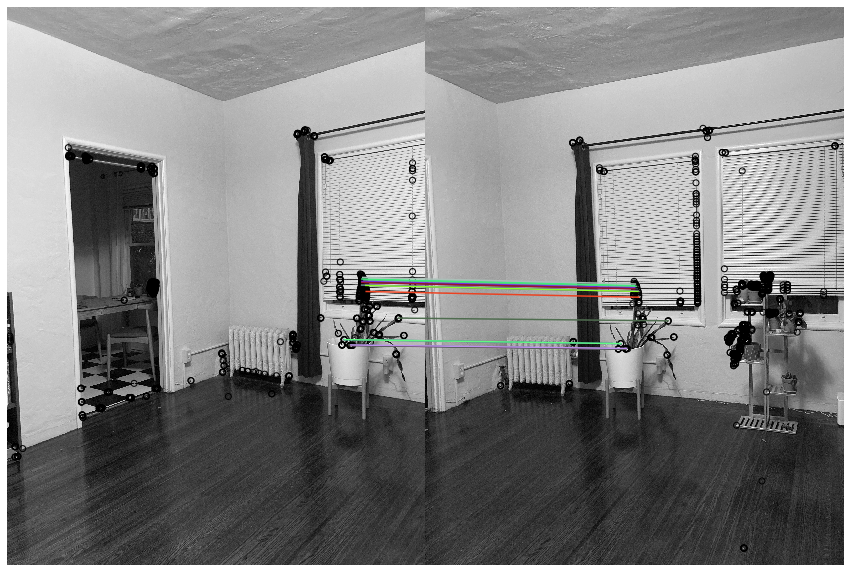

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

plot_matches(ax, room_pano0, room_pano1, keypoints0, keypoints1, matches01[inliers01])

ax.axis('off');

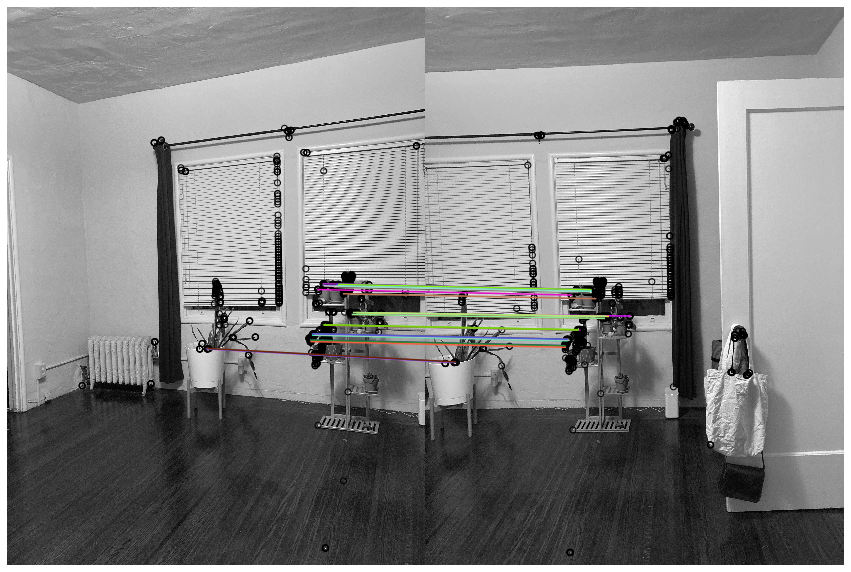

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

plot_matches(ax, room_pano1, room_pano2, keypoints1, keypoints2, matches12[inliers12])

ax.axis('off');

Finally, warp left and right images so that they can be stitched with the center image (which is my anchor!)

In [84]:
from skimage.transform import SimilarityTransform

r, c = room_pano1.shape[:2]

corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

warped_corners01 = model_robust01(corners)
warped_corners12 = model_robust12(corners)


all_corners = np.vstack((warped_corners01, warped_corners12, corners))


corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)
output_shape = (corner_max - corner_min)


output_shape = np.ceil(output_shape[::-1]).astype(int)

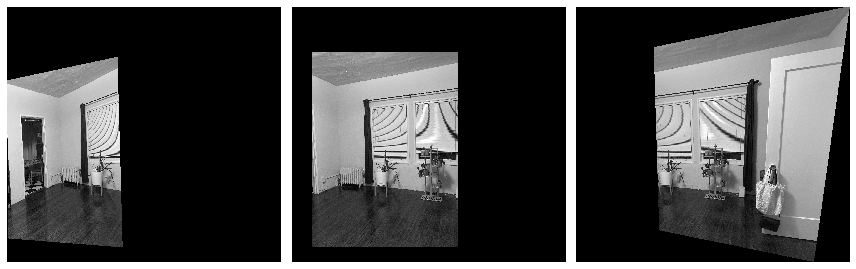

In [85]:
from skimage.transform import warp


offset1 = SimilarityTransform(translation= -corner_min)


pano1_warped = warp(room_pano1, offset1.inverse, order=3,
                    output_shape=output_shape, cval=-1)


pano1_mask = (pano1_warped != -1)  # Mask == 1 inside image
pano1_warped[~pano1_mask] = 0      # Return background values to 0

transform01 = (model_robust01 + offset1).inverse
pano0_warped = warp(room_pano0, transform01, order=3,
                    output_shape=output_shape, cval=-1)

pano0_mask = (pano0_warped != -1)  # Mask == 1 inside image
pano0_warped[~pano0_mask] = 0      # Return background values to 0

transform12 = (model_robust12 + offset1).inverse
pano2_warped = warp(room_pano2, transform12, order=3,
                    output_shape=output_shape, cval=-1)

pano2_mask = (pano2_warped != -1)  # Mask == 1 inside image
pano2_warped[~pano2_mask] = 0      # Return background values to 0
compare(pano0_warped, pano1_warped, pano2_warped, figsize=(12, 10));

In [86]:
merged = (pano0_warped + pano1_warped + pano2_warped)

Generate final pano image of my apartment

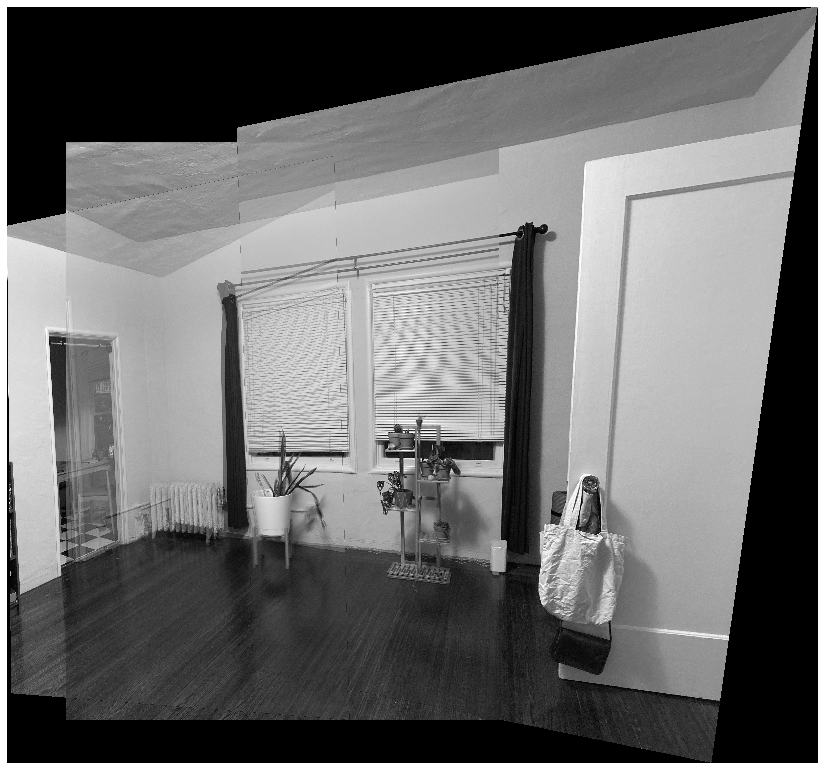

In [87]:

overlap = (pano0_mask * 1.0 +  # Multiply by 1.0 for bool -> float conversion
           pano1_mask + 
           pano2_mask)

normalized = merged / np.maximum(overlap, 1)
fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(normalized, cmap='gray')

plt.tight_layout()
ax.axis('off');

## Problem 3: Image Stacking

Stack several photos of the night sky to reveal its structure. Here are some datasets you can use:

- https://chandra.harvard.edu/photo/openFITS/
- https://esahubble.org/projects/fits_liberator/m17data/
- https://www.photographingspace.com/homework-download-stack-data/
- https://www.astropix.com/html/processing/practice_files.html
- https://www.astrobin.com/forum/c/astrophotography/other/all-my-raw-files-are-or-will-be-public-online/

(While you should use Python code to do the stacking, you can also compare your results to those obtained using dedicated software such as https://siril.org/.)

In [92]:
from astropy.io import fits

hubble = fits.open('502nmos.fits')

hubble.info()

data = hubble[0].data
print(np.shape(image_data))


Filename: 502nmos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     319   (1600, 1600)   float32   
  1  502nmos_cvt.tab    1 TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   
(1600, 1600)


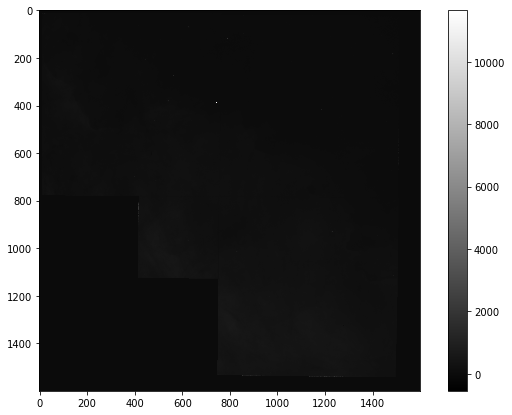

In [93]:
plt.imshow(image_data)
plt.colorbar()
hubble.close()

In [57]:
data

FITS_rec([(275.181121931, -16.1470455186, 386.5, 396.0, 2.76148e-05, -1.15452e-06, -1.1534e-06, -2.76415e-05, 0.0, 0.0, 'T', -176.744, 0, 0, 51328.640053, 51328.64021899999, 'RA---TAN', 'DEC--TAN', 4, 312.5271, 312.556, 312.4982, 17.95952, 3454.848, 126.2874, 557342, 0, 79830, 0, 61, 0, 0, 0, 'WFPC2,4,A2D7,F502N,,CAL', 3.026661e-16, -21.1, 5012.911, 48.40767, 118.8929, 69.53374, 73.60541, 0.05842515, 121.3585, 124.8048, 129.5501, 130.3738, 128.5708, 132.4107, 0.0)],
         dtype=(numpy.record, {'names':['CRVAL1','CRVAL2','CRPIX1','CRPIX2','CD1_1','CD1_2','CD2_1','CD2_2','DATAMIN','DATAMAX','MIR_REVR','ORIENTAT','FILLCNT','ERRCNT','FPKTTIME','LPKTTIME','CTYPE1','CTYPE2','DETECTOR','DEZERO','BIASEVEN','BIASODD','GOODMIN','GOODMAX','DATAMEAN','GPIXELS','SOFTERRS','CALIBDEF','STATICD','ATODSAT','DATALOST','BADPIXEL','OVERLAP','PHOTMODE','PHOTFLAM','PHOTZPT','PHOTPLAM','PHOTBW','MEDIAN','MEDSHADO','HISTWIDE','SKEWNESS','MEANC10','MEANC25','MEANC50','MEANC100','MEANC200','MEANC300','BACKGR